# Imports

## Libraries

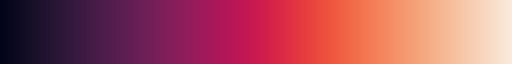

In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import seaborn as sns
from collections import Counter
import ast
from prince import MCA
from matplotlib import cm
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

# Flag Selection

## Imports

In [484]:
dir_path = "files/Thesis_Files/flag_selection"

In [485]:
# cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-BOCA-FlagSelection_new-0.csv", index_col=[0])
# cacheprof_GA = pd.read_csv(f"{dir_path}/cacheprof-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-BOCA-FlagSelection_new-0.csv", index_col=[0])
# hidden_GA = pd.read_csv(f"{dir_path}/hidden-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-BOCA-FlagSelection_new-0.csv", index_col=[0])
# maillist_GA = pd.read_csv(f"{dir_path}/maillist-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-FlagSelection_new-0.csv", index_col=[0])
# sorting_GA = pd.read_csv(f"{dir_path}/sorting-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

cacheprof_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-Redone_BOCA_Test_FlagSelection-0.csv", index_col=[0])
cacheprof_GA = pd.read_csv(f"{dir_path}/cacheprof-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-BOCA-Redone_BOCA_Test_FlagSelection-0.csv", index_col=[0])
hidden_GA = pd.read_csv(f"{dir_path}/hidden-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-BOCA-Redone_BOCA_Test_FlagSelection-0.csv", index_col=[0])
maillist_GA = pd.read_csv(f"{dir_path}/maillist-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-BOCA-Redone_BOCA_Test_FlagSelection-0.csv", index_col=[0])
sorting_GA = pd.read_csv(f"{dir_path}/sorting-Genetic-Second_Final_DataCollect-0.csv", index_col=[0])

# Iterative Ones
cacheprof_RIO =  pd.read_csv(f"{dir_path}/cacheprof-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

maillist_RIO =  pd.read_csv(f"{dir_path}/maillist-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/maillist-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

hidden_RIO =  pd.read_csv(f"{dir_path}/hidden-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/hidden-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
cacheprof_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)

sorting_RIO =  pd.read_csv(f"{dir_path}/sorting-Iterative-Second_Final_DataCollect-0.csv", index_col=[0])
for i in range(1,20):
    sorting_RIO = pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-Iterative-Second_Final_DataCollect-{i}.csv", index_col=[0])])
sorting_RIO.drop_duplicates(subset=["ID"], keep="first", inplace=True)


program_tables = {"maillist": {"BOCA": maillist_BOCA, "GA": maillist_GA, "RIO": maillist_RIO}, "hidden": {"BOCA": hidden_BOCA, "GA": hidden_GA, "RIO": hidden_RIO}, "cacheprof": {"BOCA": cacheprof_BOCA, "GA": cacheprof_GA, "RIO": cacheprof_RIO}, "sorting": {"BOCA": sorting_BOCA, "GA": sorting_GA, "RIO": sorting_RIO}}

for d in program_tables.values():
    for d_name, df in d.items():
        if not (df is None):
            df.set_index("ID", inplace=True)


for d_name, d in program_tables.items():
    for type, t in d.items():
        if type == "GA":
            t.rename(columns={'Fitness': 'Runtime'}, inplace=True)

print(program_tables["cacheprof"]["GA"].count())


Mode       113
Flags      113
Runtime    113
dtype: int64


In [486]:
flags = ["-fcall-arity", "-fcase-merge", "-fcmm-elim-common-blocks", "-fcmm-sink", "-fcpr-anal", "-fcse","-fdicts-cheap", "-fdicts-strict", "-fdmd-tx-dict-sel", "-fdo-eta-reduction", "-fdo-lambda-eta-expansion","-feager-blackholing", "-fenable-rewrite-rules", "-fexcess-precision", "-fexpose-all-unfoldings","-ffloat-in", "-ffull-laziness", "-ffun-to-thunk", "-fignore-asserts", "-fignore-interface-pragmas","-flate-dmd-anal", "-fliberate-case", "-fliberate-case-threshold=2000", "-floopification", "-fmax-inline-alloc-size=128","-fmax-inline-memcpy-insns=32", "-fmax-inline-memset-insns=32", "-fmax-relevant-binds=6", "-fmax-simplifier-iterations=4","-fmax-worker-args=10", "-fno-opt-coercion", "-fno-pre-inlining", "-fno-state-hack", "-fomit-interface-pragmas", "-fomit-yields","-foptimal-applicative-do", "-fpedantic-bottoms", "-fregs-graph", "-fregs-iterative", "-fsimplifier-phases=2", "-fsimpl-tick-factor=100","-fspec-constr", "-fspec-constr-count=3", "-fspec-constr-threshold=2000", "-fspecialise", "-fcross-module-specialise", "-fstatic-argument-transformation","-fstrictness", "-fstrictness-before=1", "-funbox-small-strict-fields", "-funbox-strict-fields", "-funfolding-creation-threshold=750","-funfolding-dict-discount=30", "-funfolding-fun-discount=60", "-funfolding-keeness-factor=1.5", "-funfolding-use-threshold=60","-fvectorisation-avoidance", "-fvectorise", "-fworker-wrapper"]

## Data Preparation

### Get Best Rows & Update Dictionaries

In [487]:
# Create the new dictionary to store the updated values
updated_program_tables = dict()
for program, config_dict in program_tables.items():
    updated_config_dict = dict()
    
    for config, dataframe in config_dict.items():
        if dataframe is not None:
            # Extract rows by index
            #print(dataframe.head(4))
            row_O0 = dataframe.loc["-O0"]
            row_O2 = dataframe.loc["-O2"]
            # Find the row with the minimum "Runtime" value
            best_row = dataframe.loc[dataframe["Runtime"].idxmin()]
            
            # Create the new dictionary for the current configuration
            updated_config = {
                "table": dataframe,
                "-O0": row_O0,
                "-O2": row_O2,
                "Best": best_row
            }
            
            updated_config_dict[config] = updated_config
    
    updated_program_tables[program] = updated_config_dict
# Now, `updated_program_tables` contains the updated dictionary as you specified.

## Analysis

### Table: -O0 vs. -O2 vs. Optimal

In [488]:
# Assuming `updated_program_tables` contains your updated dictionary
data = []
programs = list(updated_program_tables.keys())
configurations = ["BOCA", "GA", "RIO"]
columns = ["-O0", "-O2", "Optimal", "Improvement", "Avg"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if updated_program_tables[program][config] is not None:
            row_O0 = updated_program_tables[program][config]["-O0"]["Runtime"]
            row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"]
            best_row = updated_program_tables[program][config]["Best"]["Runtime"]
            improvement = f"{round(-1*(1 - best_row/row_O2)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_O2)*100,3)}%"
            program_data.append([row_O0, row_O2, best_row, improvement, average])
            row_O0s.append(row_O0)
            row_O2s.append(row_O2)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    for config in configurations:
        updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
        updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)

# Assign the MultiIndex
df.index = index
print(df)


                           -O0    -O2  Optimal Improvement      Avg
Program   Configuration                                            
maillist  BOCA           0.640  0.640    0.634     -0.938%   9.377%
          GA             0.535  0.535    0.520     -2.804%   2.371%
          RIO            0.527  0.527    0.520     -1.328%   2.059%
hidden    BOCA           0.489  0.489    0.478     -2.249%  -0.221%
          GA             0.517  0.517    0.501     -3.095%  -0.226%
          RIO            0.521  0.514    0.506     -1.556%   0.719%
cacheprof BOCA           0.212  0.212    0.209     -1.415%   0.321%
          GA             0.437  0.437    0.431     -1.373%   0.407%
          RIO            0.439  0.439    0.431     -1.822%  12.943%
sorting   BOCA           0.212  0.212    0.209     -1.415%   0.321%
          GA             0.211  0.211    0.207     -1.896%  -0.474%
          RIO            0.211  0.208    0.207     -0.481%   1.106%


### Box-Plots to Show Distribution

#### Normalization Calculation Set-Up

##### -O2

In [489]:
normalize_around = "-O2"

for program, config_dict in updated_program_tables.items():
    for config, table_data in config_dict.items():
        if table_data is not None:
            df = table_data["table"]
            df["Norm-Z"] = (df["Runtime"] - df["Runtime"].mean()) / df["Runtime"].std()
            row_O0 = df.loc["-O0"]
            row_O2 = df.loc["-O2"]
            shift = row_O2["Runtime"]
            df["Norm-O2"] = (df["Runtime"] - shift) / df["Runtime"].std()

#### Z-Score

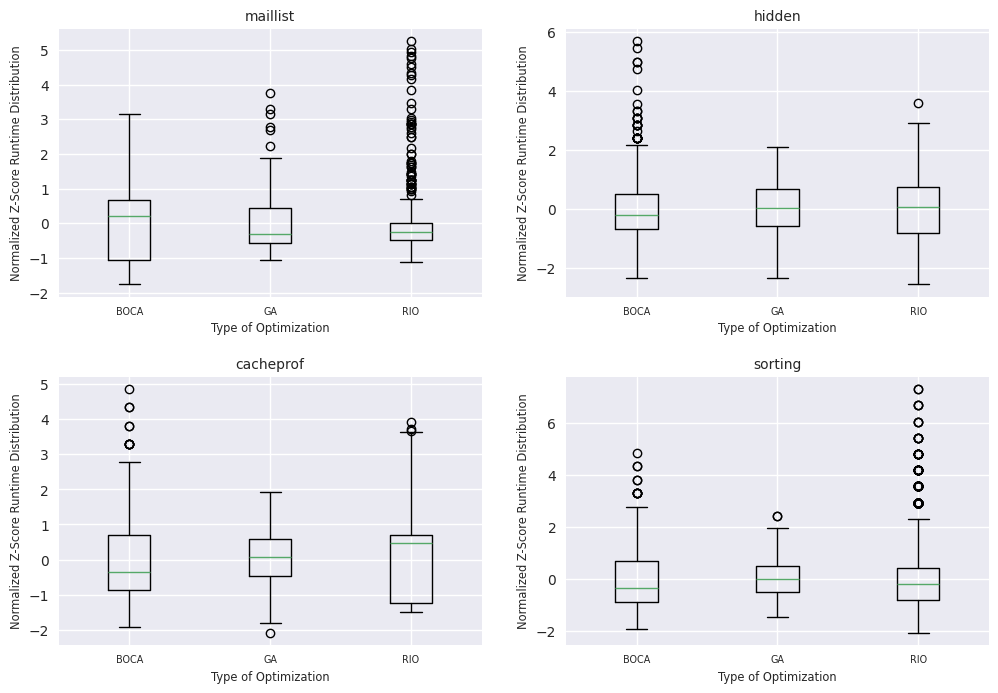

In [490]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in updated_program_tables.items():
    lst1 = []
    labels = []
    for type_name, type_results in type_dict.items():
        if type_name != "IO":
            labels.append(type_name)
            df = type_results["table"]
            lst1.append(df["Norm-Z"])
    # if i == 2:
    #     i = 0
    #     if j == 2:
    #         j == 0
    #     else:
    #         j += 1
    # i += 1
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized Z-Score Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    if i ==  0:
        ax[i][j].set_title(f"{program_name}", pad=20)
    ax[i][j].set_title(f"{program_name}", fontsize="small")
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig('thesis_figures/Z_score_boxplot.svg', format='svg', dpi=1200)
plt.show()

#### -O2

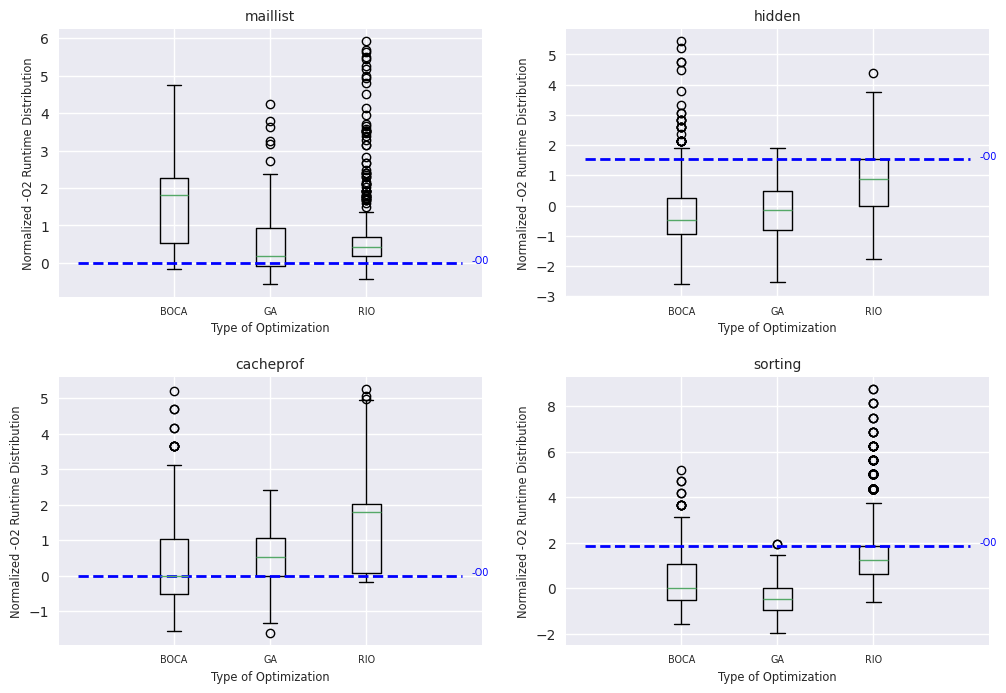

In [491]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in updated_program_tables.items():
    lst1 = []
    labels = []
    O0_line = 0
    for type_name, type_results in type_dict.items():
        labels.append(type_name)
        df = type_results["table"]
        #print(df["Norm-O2"].head(4))
        O0_line = df.loc["-O0"]["Norm-O2"]
        lst1.append(df["Norm-O2"])


    
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized -O2 Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    ax[i][j].set_title(f"{program_name}", fontsize="small")

    ax[i][j].hlines(y=O0_line, xmin=0, xmax=len(labels) + 1, color='b', linestyle='dashed', linewidth=2)
    ax[i][j].text(len(labels) + 1.1, O0_line, '-O0', fontsize='xx-small', color='b')
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig('thesis_figures/O2_score_boxplot.svg', format='svg', dpi=1200)
plt.show()


### Convergence

[[34 16 48 48]
 [28 27 28 30]
 [17  8 22 25]]
{'maillist': {'BOCA': 34, 'GA': 28, 'Both': 17}, 'hidden': {'BOCA': 16, 'GA': 27, 'Both': 8}, 'cacheprof': {'BOCA': 48, 'GA': 28, 'Both': 22}, 'sorting': {'BOCA': 48, 'GA': 30, 'Both': 25}}


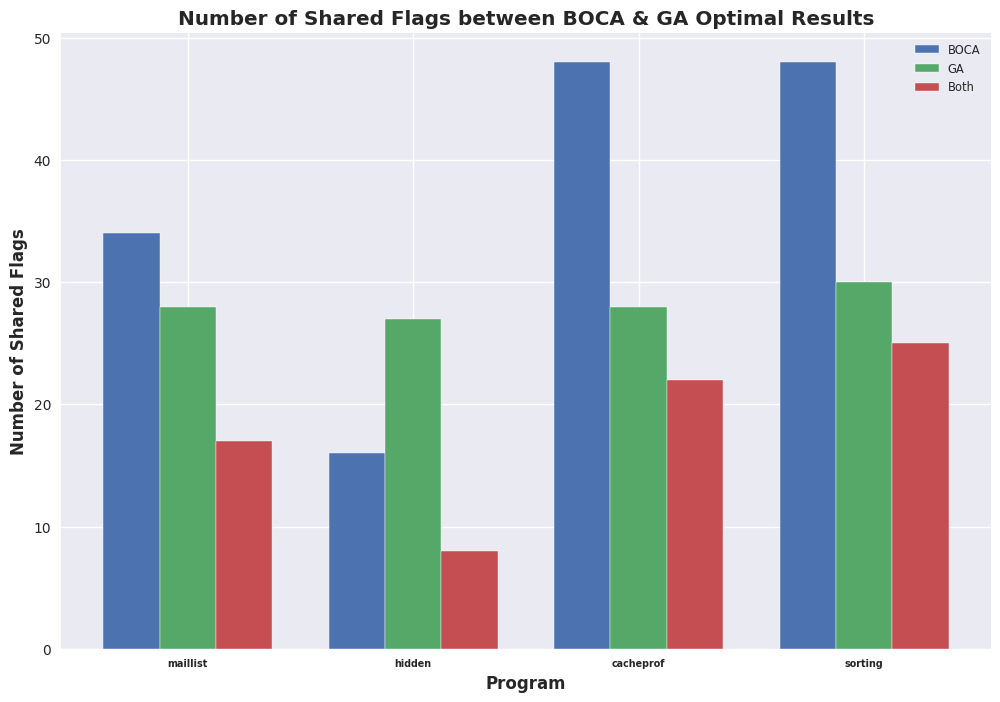

In [492]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

occuring_flags = []
labels = []

i = 0
j = 0
convergence_dict = dict()
for program_name, type_dict in updated_program_tables.items():
    occuring_flags = []
    labels = []
    for type_name, type_results in type_dict.items():
        if type_name != "RIO":
            best_flags = type_results["Best"]["Flags"]
            best_flags = eval(best_flags)[1:]
            occuring_flags.append(best_flags)
            labels.append(type_name)
            
    if len(occuring_flags) > 0:
        num_of_match = list(set(occuring_flags[0]).intersection(set(occuring_flags[1])))
        convergence_dict[program_name] = {labels[0]: len(occuring_flags[0]), labels[1]: len(occuring_flags[1]), "Both": len(num_of_match)}

programs = list(convergence_dict.keys())
configurations = list(convergence_dict["sorting"].keys())
values = np.array([[convergence_dict[program][config] for program in programs] for config in configurations])

print(values)

width = 0.25
x = np.arange(len(programs))

for i, config in enumerate(configurations):
    ax.bar(x + i * width, values[i], width=width, label=config)

ax.set_xlabel('Program', fontsize="medium", weight='bold')
ax.set_ylabel('Number of Shared Flags', fontsize="medium", weight='bold')
ax.set_title('Number of Shared Flags between BOCA & GA Optimal Results', fontsize="large", weight='bold')
ax.set_xticks(x + width * (len(configurations) - 1) / 2)
ax.set_xticklabels(programs, fontsize="xx-small", weight='bold')
ax.legend(fontsize="x-small")

print(convergence_dict)

plt.savefig('thesis_figures/converg_barplot.svg', format='svg', dpi=1200)

plt.show()

### Remaining Benchmark Allowance

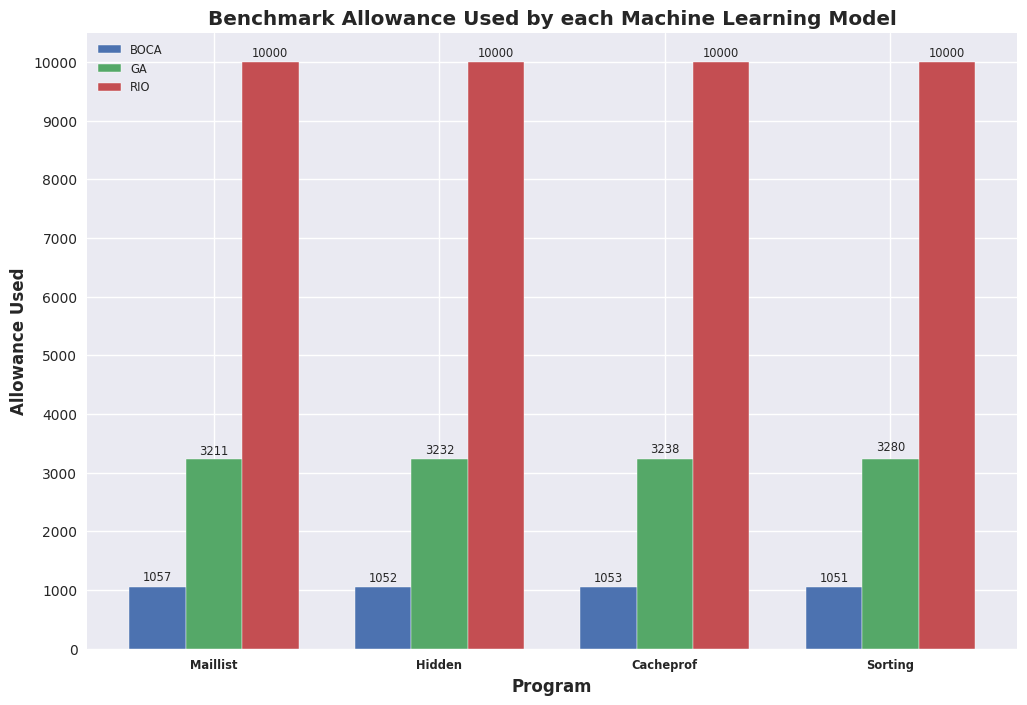

In [493]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

programs = ["Maillist", "Hidden", "Cacheprof", "Sorting"]
ml_models = ["BOCA", "GA", "RIO"]
boca_data = [1057, 1052, 1053, 1051]
ga_data = [3211, 3232, 3238, 3280]
rio_data = [10000, 10000, 10000, 10000]

data_list = [boca_data, ga_data, rio_data]

width = 0.25
x = np.arange(len(programs))

for i, config in enumerate(data_list):
    ax.bar(x + i * width, config[i], width=width, label=ml_models[i])

    for j, value in enumerate(config):
        ax.text(x[j] + i * width, value + 50, str(value), ha='center', va='bottom', fontsize="x-small")

ax.set_xlabel('Program', fontsize="medium", weight='bold')
ax.set_ylabel('Allowance Used', fontsize="medium", weight='bold')
ax.set_title('Benchmark Allowance Used by each Machine Learning Model', fontsize="large", weight='bold')
ax.set_xticks(x + width * (len(configurations) - 1) / 2)
ax.set_yticks(np.arange(0, max(max(data_list)) + 1000, 1000))
ax.set_xticklabels(programs, fontsize="x-small", weight='bold')
ax.legend(fontsize="x-small")


plt.savefig('thesis_figures/allowance_plot.svg', format='svg', dpi=1200)
plt.show()


## Feature Importance

### PCA Analysis

#### Scaling

In [494]:
scaling_tables = program_tables.copy()

feature_df = pd.DataFrame(columns=flags + ["Runtime"])
scaled_data = []

# Iterate through each row in the original DataFrame
for program_name, config_dict in program_tables.items():
    for config, df in config_dict.items():
        df = df.iloc[2:]
        df["Flags"] = df["Flags"].apply(ast.literal_eval)
        new_rows = []
        for index, row in df.iterrows():
            # Initialize a list to hold flag values for this row
            flag_values = [0] * len(flags)
            
            # Iterate through each flag in the row
            #print(row['Flags'])
            for index, flag in enumerate(row.Flags):
                # Find the index of the flag in my_flags and set the corresponding value to 1
                if flag in flags:
                    flag_values[flags.index(flag)] = 1
                
            # Append the row to the new DataFrame with flag values and Runtime
            new_rows.append(flag_values + [None])
        scaling=StandardScaler()
        scaling.fit(np.array(df["Runtime"]).reshape(-1, 1))
        scaled_data=scaling.transform(np.array(df["Runtime"]).reshape(-1, 1))
        for index, row in enumerate(new_rows):
            row[len(row) - 1] = scaled_data[index][0]
        new_df = pd.DataFrame(columns=feature_df.columns, data=new_rows)
        feature_df = pd.concat([feature_df, new_df], axis=0)
        

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(np.array(feature_df["Runtime"]).reshape(-1, 1))
# scaled_data=scaling.transform(np.array(feature_df["Runtime"]).reshape(-1, 1))

feature_df.tail(3)

,-fcall-arity,-fcase-merge,-fcmm-elim-common-blocks,-fcmm-sink,-fcpr-anal,-fcse,-fdicts-cheap,-fdicts-strict,-fdmd-tx-dict-sel,-fdo-eta-reduction,...,-funbox-strict-fields,-funfolding-creation-threshold=750,-funfolding-dict-discount=30,-funfolding-fun-discount=60,-funfolding-keeness-factor=1.5,-funfolding-use-threshold=60,-fvectorisation-avoidance,-fvectorise,-fworker-wrapper,Runtime
9556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.188277
9557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.062847
9558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.813839


In [495]:
feature_df[feature_df["-fcall-arity"] == 1]

,-fcall-arity,-fcase-merge,-fcmm-elim-common-blocks,-fcmm-sink,-fcpr-anal,-fcse,-fdicts-cheap,-fdicts-strict,-fdmd-tx-dict-sel,-fdo-eta-reduction,...,-funbox-strict-fields,-funfolding-creation-threshold=750,-funfolding-dict-discount=30,-funfolding-fun-discount=60,-funfolding-keeness-factor=1.5,-funfolding-use-threshold=60,-fvectorisation-avoidance,-fvectorise,-fworker-wrapper,Runtime
0,1,1,1,1,0,1,0,0,1,1,...,1,0,1,1,1,1,0,1,1,-1.394199
1,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,0,0,1,0,1,-1.474424
7,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,-1.287233
10,1,1,0,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,-1.313975
12,1,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,-1.394199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,0,0,1,1,0,1,1,1,0,...,1,1,0,0,1,0,1,1,0,1.468871
109,1,0,1,1,1,0,1,1,0,1,...,0,0,1,0,1,1,1,0,1,1.468871
111,1,0,0,0,0,1,1,1,0,0,...,0,0,1,1,0,0,0,1,0,1.468871
116,1,1,1,1,0,0,1,1,1,1,...,1,1,1,0,1,0,0,0,1,1.955767


#### PCA Chart

In [496]:
principal = PCA(n_components=3)
principal.fit(feature_df.drop("Runtime",axis=1))
x = principal.transform(feature_df.drop("Runtime",axis=1))
 
# Check the dimensions of data after PCA
print(x.shape)

(43582, 3)


In [497]:
principal.components_

array([[ 0.14056461,  0.10534462,  0.10982809,  0.12113539,  0.15834622,
         0.1239395 ,  0.16274401,  0.15299981,  0.1319609 ,  0.12517862,
         0.14579672,  0.1391373 ,  0.1497741 ,  0.13493731,  0.07348891,
         0.11080819,  0.13823551,  0.1217629 ,  0.13235563,  0.1308928 ,
         0.11787511,  0.16239988,  0.13543055,  0.14945547,  0.12234923,
         0.12719141,  0.11360014,  0.10711712,  0.09331433,  0.13506831,
         0.11254676,  0.15055896,  0.13702113,  0.14156235,  0.14127576,
         0.13259168,  0.15381047,  0.12920182,  0.14381236,  0.1235543 ,
         0.12646766,  0.1337613 ,  0.13328211,  0.11966201,  0.10479944,
         0.08849865,  0.16519198,  0.11815342,  0.13364827,  0.1172229 ,
         0.08644237,  0.13906419,  0.09155144,  0.13210701,  0.14360162,
         0.14699586,  0.11920321,  0.0933281 ,  0.15695051],
       [ 0.15479488, -0.02457844,  0.0387882 , -0.12231383,  0.2084765 ,
        -0.00423373, -0.07185981, -0.14227492, -0.17089277, -0.

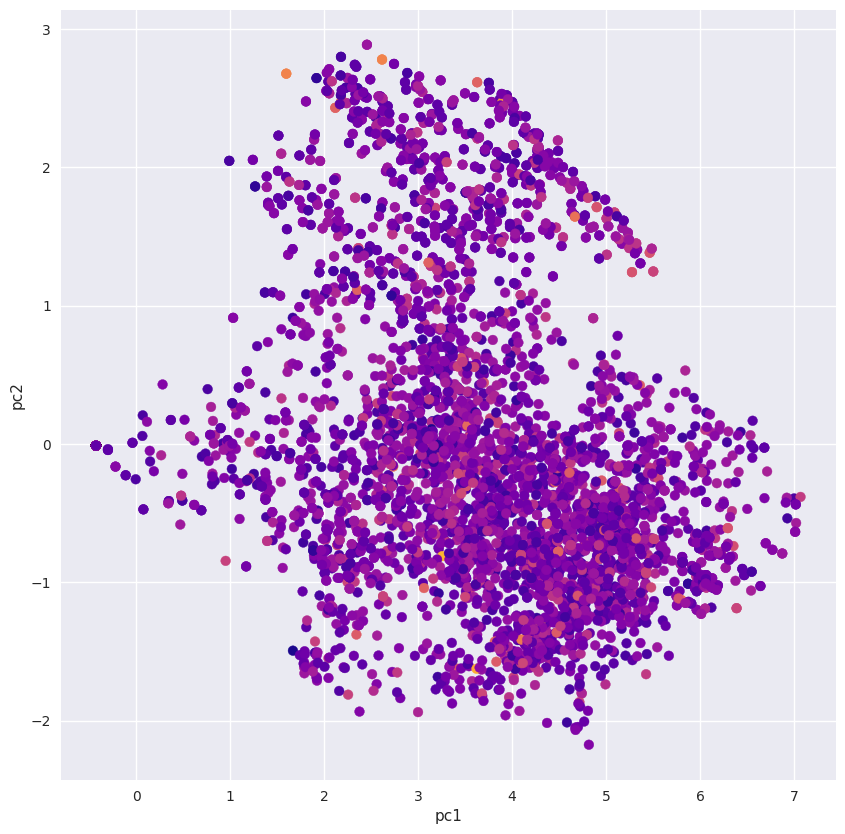

In [498]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=feature_df['Runtime'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('thesis_figures/PCA_2d_plot.svg', format='svg', dpi=1200)

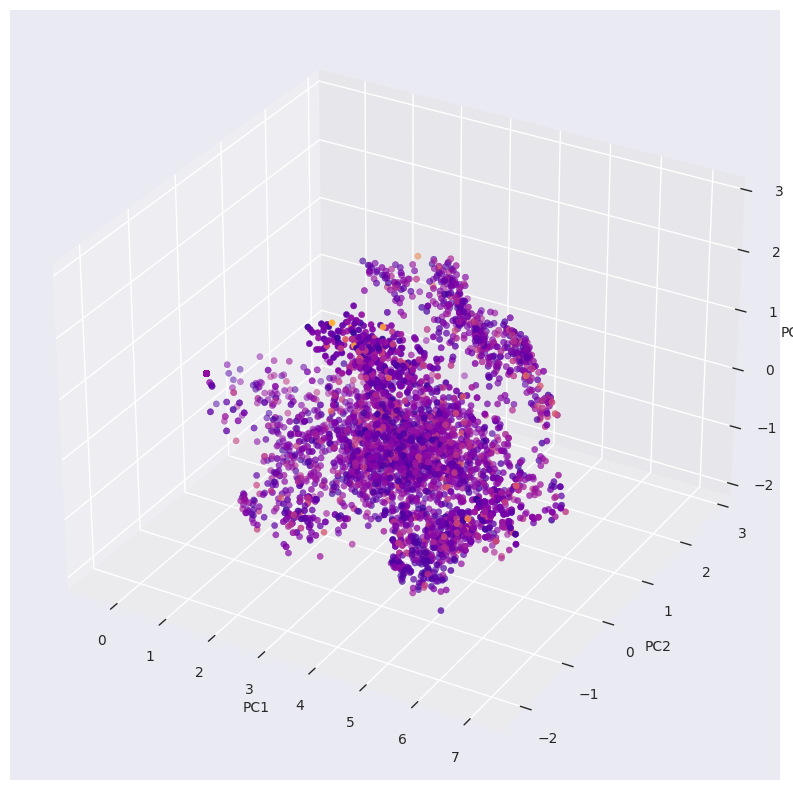

In [499]:
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=feature_df['Runtime'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.savefig('thesis_figures/PCA_3d_plot.svg', format='svg', dpi=1200)

#### Scree Plot

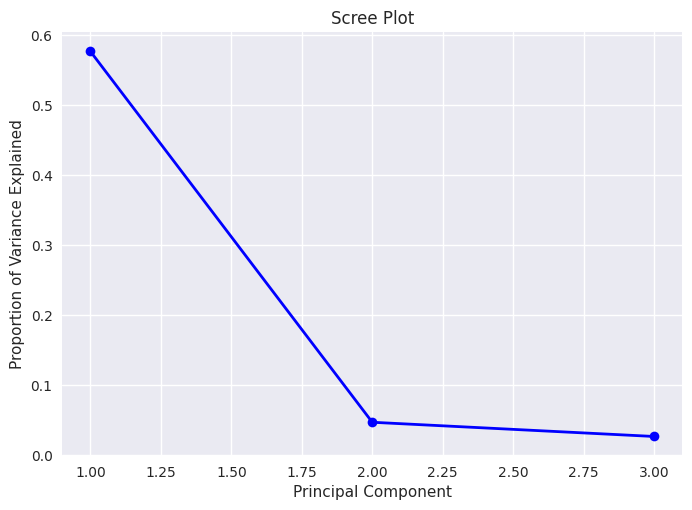

In [500]:
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'ro-', linewidth=2, color="blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

#### Loading Plot

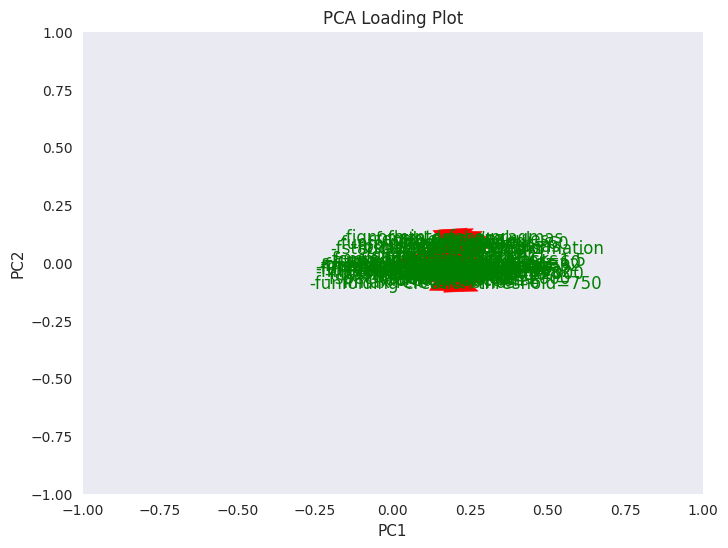

In [501]:
# Extract loadings
loadings = principal.components_.T * np.sqrt(principal.explained_variance_)

# Plot loadings
plt.figure(figsize=(8, 6))
for i, feature in enumerate(feature_df.drop("Runtime",axis=1).columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.1, head_length=0.1, color='r')
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Loading Plot')
plt.show()

### MCA Analysis

In [502]:
for col in feature_df.columns:
    feature_df[col] = pd.to_numeric(feature_df[col])

In [503]:
mca = MCA(n_components=2)
mca.fit(feature_df.drop("Runtime",axis=1))
print("Eigenvalues:")
print(mca.eigenvalues_)

# # Principal inertia
# print("Principal Inertia:")
# print(mca.explained_inertia_)

# Transformed data
print("Transformed Data:")
transformed_data = mca.transform(feature_df.drop("Runtime",axis=1))

Eigenvalues:
[0.5640104  0.04474587]
Transformed Data:


In [504]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.564,56.40%,56.40%
1,0.045,4.47%,60.88%


In [505]:
# Get the row and column coordinates (normalized singular values) after fitting
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
column_coordinates = mca.column_coordinates(feature_df.drop("Runtime",axis=1))

# Calculate the variance explained by each feature after using 6 components
variance_explained_by_feature = (column_coordinates ** 2).sum(axis=1)

# Sort the features based on their contribution to the variance
top_features = variance_explained_by_feature.sort_values(ascending=False)

# Print the top 6 features
print("Top 6 features contributing the most to the variance after using 6 components:")
print(top_features.head(6))


Top 6 features contributing the most to the variance after using 6 components:
-fspecialise_1                    2.015534
-funbox-strict-fields_1           1.580412
-fno-opt-coercion_1               1.579421
-fvectorise_1                     1.530418
-fdo-eta-reduction_1              1.489812
-fmax-inline-memcpy-insns=32_1    1.479199
dtype: float64


In [506]:
mca.column_contributions_.style.format('{:.0%}')

,0,1
-fcall-arity_0,0%,0%
-fcall-arity_1,2%,3%
-fcase-merge_0,0%,0%
-fcase-merge_1,1%,0%
-fcmm-elim-common-blocks_0,0%,0%
-fcmm-elim-common-blocks_1,1%,0%
-fcmm-sink_0,0%,0%
-fcmm-sink_1,2%,1%
-fcpr-anal_0,0%,0%
-fcpr-anal_1,2%,4%


In [507]:
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime",axis=1))
row_coordinates

,0,1
0,2.230223,0.020244
1,2.992971,-0.547786
2,0.857237,0.508390
3,-0.240689,-0.008311
4,0.437162,-0.047881
...,...,...
9554,-0.240689,-0.008311
9555,-0.240689,-0.008311
9556,-0.240689,-0.008311
9557,-0.240689,-0.008311


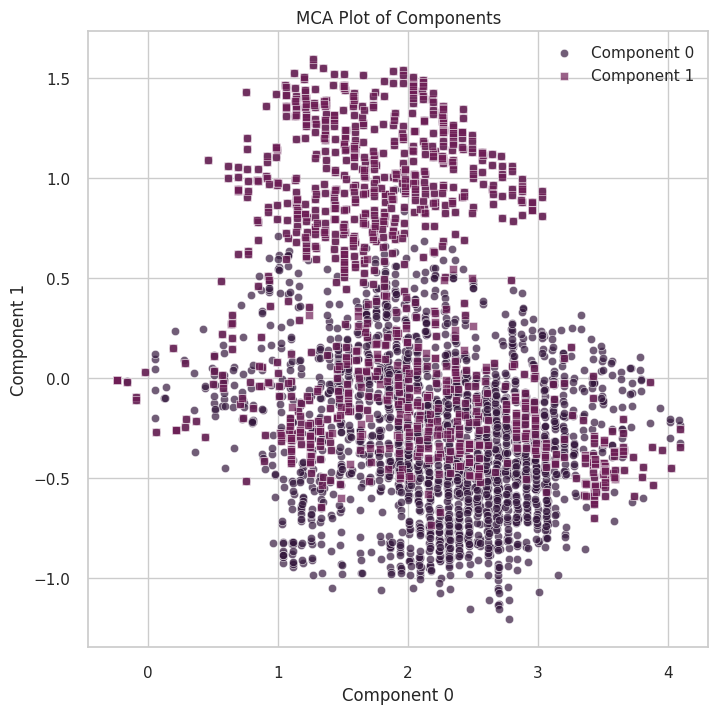

In [508]:
import seaborn as sns

# Set seaborn style with a warm and nuanced color palette
sns.set(style="whitegrid", palette="rocket")

# Get the row coordinates (coordinates of categories) for the first two components
row_coordinates = mca.row_coordinates(feature_df.drop("Runtime", axis=1))

# Plot the row coordinates on a scatter plot
plt.figure(figsize=(8, 8))

# Plot points for Component 0 with circles
sns.scatterplot(x=row_coordinates.iloc[:, 0][0:len(row_coordinates)//2], 
                y=row_coordinates.iloc[:, 1][0:len(row_coordinates)//2], 
                alpha=0.7, label='Component 0', marker='o')

# Plot points for Component 1 with squares
sns.scatterplot(x=row_coordinates.iloc[:, 0][len(row_coordinates)//2:], 
                y=row_coordinates.iloc[:, 1][len(row_coordinates)//2:], 
                alpha=0.7, label='Component 1', marker='s')

plt.title('MCA Plot of Components')
plt.xlabel('Component 0')
plt.ylabel('Component 1')

# Add legend
plt.legend()
plt.savefig('thesis_figures/MCA_2d_plot.svg', format='svg', dpi=1200)
plt.show()


In [509]:

# Compute feature coordinates (loadings)
# feature_coordinates = mca.column_coordinates(feature_df.drop("Runtime", axis=1))

# # Set seaborn style
# # sns.set()

# # Plot row coordinates (loadings)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=row_coordinates.iloc[:, 0], y=row_coordinates.iloc[:, 1], color='blue')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.title('MCA Loading Plot')

# # Plot arrows for feature loadings
# for i, feature in enumerate(feature_df.drop("Runtime", axis=1).columns):
#     plt.arrow(0, 0, feature_coordinates.iloc[i, 0], feature_coordinates.iloc[i, 1], color='red', width=0.01, head_width=0.05)
#     plt.text(feature_coordinates.iloc[i, 0]*1.1, feature_coordinates.iloc[i, 1]*1.1, feature, color='red')

# plt.grid()
# plt.show()

# Phase-Order

## Data Imports

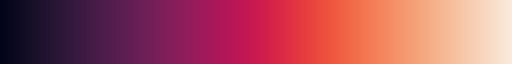

In [510]:
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

In [511]:
dir_path = "files/Thesis_Files/phase_order"

In [512]:
# RIO Test Results
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])

# BOCA Test Results
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Boca_Presentation_Thesis_Test_4Program-0.csv", index_col=[0])
sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Boca_Presentation_Thesis_Test_4Program-0.csv", index_col=[0])
maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Boca_Presentation_Thesis_Test_4Program-0.csv", index_col=[0])
hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Boca_Presentation_Thesis_Test_4Program-0.csv", index_col=[0])

# Control Group (O2 In Default Order)
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

# Add additional RIO Results
for i in range(1,4):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    sorting_RIO= pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    maillist_RIO = pd.concat([maillist_RIO, pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    hidden_RIO = pd.concat([hidden_RIO, pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])


# # New Slow + Fast Rule:
cacheprof_special = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
hidden_special = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
maillist_special = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
sorting_special = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])

cacheprof_special_5p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
hidden_special_5p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
maillist_special_5p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])
sorting_special_5p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-5P-0.csv", index_col=[0])

cacheprof_special_1p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
hidden_special_1p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
maillist_special_1p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])
sorting_special_1p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-1P-0.csv", index_col=[0])


cacheprof_special_005p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
hidden_special_005p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
maillist_special_005p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])
sorting_special_005p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-RULE-005P-0.csv", index_col=[0])

# # Multi-Table test

# cacheprof_special_multi = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
# hidden_special_multi = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
# maillist_special_multi = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])
# sorting_special_multi = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-0.csv", index_col=[0])

# # Multi-table 1% Test
# cacheprof_special_multi_1p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
# sorting_special_multi_1p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
# maillist_special_multi_1p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])
# hidden_special_multi_1p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-SPECIAL-MULTI-RULE-1P-0.csv", index_col=[0])

# # Multi-Threading Test
# cacheprof_multi_thread = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
# sorting_multi_thread = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
# maillist_multi_thread = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])
# hidden_multi_thread = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PCA_THREADING_TEST-0.csv", index_col=[0])

# cacheprof_multi_thread_2 = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
# sorting_multi_thread_2 = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
# maillist_multi_thread_2 = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])
# hidden_multi_thread_2 = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PCA_THREADING_TEST_2-0.csv", index_col=[0])

# # Combined Test 
# cacheprof_combined = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Combined_Large_Features_Test-0.csv", index_col=[0])
# sorting_combined = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Combined_Large_Features_Test-0.csv", index_col=[0])
# maillist_combined = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Combined_Large_Features_Test-0.csv", index_col=[0])
# hidden_combined = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Combined_Large_Features_Test-0.csv", index_col=[0])

# # Large Features Test Combined 2
# cacheprof_combined_2 = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Combined_Large_Features_Test_2-0.csv", index_col=[0])
# sorting_combined_2 = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Combined_Large_Features_Test_2-0.csv", index_col=[0])
# maillist_combined_2 = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Combined_Large_Features_Test_2-0.csv", index_col=[0])
# hidden_combined_2 = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Combined_Large_Features_Test_2-0.csv", index_col=[0])

# # Impactful Features 10% Test to see if it can still pick them all up
# cacheprof_impact_10p = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Impactful_Features_Test_10p-0.csv", index_col=[0])
# sorting_impact_10p = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Impactful_Features_Test_10p-0.csv", index_col=[0])
# maillist_impact_10p = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Impactful_Features_Test_10p-0.csv", index_col=[0])
# hidden_impact_10p = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Impactful_Features_Test_10p-0.csv", index_col=[0])

# # Gini List Change
# cacheprof_gini = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Gini_List_Sort_Removed_Test-0.csv", index_col=[0])
# sorting_gini = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Gini_List_Sort_Removed_Test-0.csv", index_col=[0])
# maillist_gini = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Gini_List_Sort_Removed_Test-0.csv", index_col=[0])
# hidden_gini = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Gini_List_Sort_Removed_Test-0.csv", index_col=[0])

# # Alternate Calc Test Using Random Forest Estimators instead of Decision Tree Estimators
# cacheprof_alt = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Alternate_Impact_Calc_Test-0.csv", index_col=[0])
# sorting_alt = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Alternate_Impact_Calc_Test-0.csv", index_col=[0])
# maillist_alt = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Alternate_Impact_Calc_Test-0.csv", index_col=[0])
# hidden_alt = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Alternate_Impact_Calc_Test-0.csv", index_col=[0])

# # Decision Calc Test Using Single Threading
# cacheprof_st_calc = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-SINGLE_THREAD_AFTER_IMPACT_CHANGE_SMALL-0.csv", index_col=[0])
# sorting_st_calc = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-SINGLE_THREAD_AFTER_IMPACT_CHANGE_SMALL-0.csv", index_col=[0])
# maillist_st_calc = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-SINGLE_THREAD_AFTER_IMPACT_CHANGE_SMALL-0.csv", index_col=[0])
# hidden_st_calc = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-SINGLE_THREAD_AFTER_IMPACT_CHANGE_SMALL-0.csv", index_col=[0])


# # Post-BugFix Mini-Test
# cacheprof_bug = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-Single_Threaded_After_BugFix-0.csv", index_col=[0])
# sorting_bug = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-Single_Threaded_After_BugFix-0.csv", index_col=[0])
# maillist_bug = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-Single_Threaded_After_BugFix-0.csv", index_col=[0])
# hidden_bug = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-Single_Threaded_After_BugFix-0.csv", index_col=[0])


# slow_tables = {"cacheprof": cacheprof_slow, "maillist": maillist_slow, "hidden": hidden_slow, "sorting": sorting_slow}
# fast_tables = tables = {"cacheprof": cacheprof_fast, "maillist": maillist_fast, "hidden": hidden_fast, "sorting": sorting_fast}
program_tables = {"cacheprof": {"BOCPA": cacheprof_BOCA, "RIO": cacheprof_RIO, "O2": cacheprof_default}, "sorting": {"BOCPA": sorting_BOCA, "RIO": sorting_RIO, "O2": sorting_default}, "hidden": {"BOCPA": hidden_BOCA, "RIO":  hidden_RIO, "O2": hidden_default}, "maillist": {"BOCPA": maillist_BOCA, "RIO": maillist_RIO, "O2": maillist_default}}
# program_tables_BOCA_Fixed = {"cacheprof": cacheprof_BOCA_Fixed , "hidden": hidden_BOCA_Fixed , "maillist": maillist_BOCA_Fixed , "sorting": sorting_BOCA_Fixed}
correctness_tables = {"cacheprof": cacheprof_special, "hidden": hidden_special, "maillist": maillist_special, "sorting": sorting_special}
correctness_tables_5p = {"cacheprof": cacheprof_special_5p, "hidden": hidden_special_5p, "maillist": maillist_special_5p, "sorting": sorting_special_5p}
correctness_tables_1p = {"cacheprof": cacheprof_special_1p, "hidden": hidden_special_1p, "maillist": maillist_special_1p, "sorting": sorting_special_1p}
correctness_tables_005p = {"cacheprof": cacheprof_special_005p, "hidden": hidden_special_005p, "maillist": maillist_special_005p, "sorting": sorting_special_005p}
# correctness_tables_multi = {"cacheprof": cacheprof_special_multi, "hidden": hidden_special_multi, "maillist": maillist_special_multi, "sorting": sorting_special_multi}
# correctness_tables_multi_1p = {"cacheprof": cacheprof_special_multi_1p, "hidden": hidden_special_multi_1p, "maillist": maillist_special_multi_1p, "sorting": sorting_special_multi_1p}
# multi_threading = {"cacheprof": cacheprof_multi_thread, "hidden": hidden_multi_thread, "maillist": maillist_multi_thread, "sorting": sorting_multi_thread}
# multi_threading_2 = {"cacheprof": cacheprof_multi_thread_2, "hidden": hidden_multi_thread_2, "maillist": maillist_multi_thread_2, "sorting": sorting_multi_thread_2}
# combined_test = {"cacheprof": cacheprof_combined, "hidden": hidden_combined, "maillist": maillist_combined, "sorting": sorting_combined}
# combined_test_2 = {"cacheprof": cacheprof_combined_2, "hidden": hidden_combined_2, "maillist": maillist_combined_2, "sorting": sorting_combined_2}
# impactful_10p = {"cacheprof": cacheprof_impact_10p, "hidden": hidden_impact_10p, "maillist": maillist_impact_10p, "sorting": sorting_impact_10p}
# gini_tables = {"cacheprof": cacheprof_gini, "hidden": hidden_gini, "maillist": maillist_gini, "sorting": sorting_gini}
# rf_tables = {"cacheprof": cacheprof_alt, "hidden": hidden_alt, "maillist": maillist_alt, "sorting": sorting_alt}
# single_thread_calc = {"cacheprof": cacheprof_st_calc, "hidden": hidden_st_calc, "maillist": maillist_st_calc, "sorting": sorting_st_calc}
# comparison_impact = {"cacheprof": cacheprof_BOCA_Fixed , "hidden": hidden_BOCA_Fixed , "maillist": maillist_BOCA_Fixed , "sorting": sorting_BOCA_Fixed}
# tables_post_bugfix = {"cacheprof": cacheprof_bug , "hidden": hidden_bug , "maillist": maillist_bug , "sorting": sorting_bug}

## Data Preparation

In [513]:
O2_list = ["liberate_case","spec_constr","rule_check2","late_specialise","triple_combo","late_dmd_anal","strict_anal","rule_check3","add_caller","add_late"] #, "my_good_optimization", "my_neutral_optimization", "my_bad_optimization", my_good_optimization_2, my_good_optimization_3, my_good_optimization_4, my_good_optimization_5, my_good_optimization_6]
O0_list = ["static_args", "presimplify","specialise","full_laziness_1","simpl3","float_in_1","call_arity","strictness","exitification","full_laziness_2","cse","float_in_2","final","rule_check1"]

### Normalization & Standardization

In [514]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])

In [515]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        normalize_around = O2_numbers
        offset = normalize_around - t["Runtime"].mean()
        t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()

## Analysis

### Table (RIO vs. BOCPA vs. Default)

In [516]:

# THIS IS USING THE BEST RUNTIME

data = []
programs = list(program_tables.keys())
configurations = ["BOCPA", "RIO"]
columns = ["Optimal", "Default", "Improvement", "Avg. Improvement"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if program_tables[program][config] is not None:
            row_Optimal = round(program_tables[program][config].sort_values("Runtime", ascending=True).iloc[0]["Runtime"],3)
            row_Default = round(program_tables[program]["O2"]["Runtime"].mean(),3)
            improvement = f"{round(-1*(1 - row_Optimal/row_Default)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_Default)*100,3)}%"
            program_data.append([row_Optimal, row_Default, improvement, average])
            row_O0s.append(row_Optimal)
            row_O2s.append(row_Default)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    
    # for config in configurations:
    #     updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
    #     row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# print(index)
# print(data)

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)


# Assign the MultiIndex
df.index = index


print(df)
df.to_csv("PO_table_results.csv")


                         Optimal  Default Improvement Avg. Improvement
Program   Configuration                                               
cacheprof BOCPA            0.113    0.118     -4.237%          -1.581%
          RIO              0.113    0.118     -4.237%          -1.669%
sorting   BOCPA            0.139    0.147     -5.442%          -2.215%
          RIO              0.150    0.147      2.041%           4.481%
hidden    BOCPA            0.123    0.128     -3.906%          -1.209%
          RIO              0.126    0.128     -1.562%           0.247%
maillist  BOCPA            0.590    0.617     -4.376%           4.399%
          RIO              0.660    0.617      6.969%          11.945%


### Box Plots

#### Z-Score

In [517]:
def make_Z_boxplot(program_name, tables_dict):
    fig, ax = plt.subplots()
    
    lst1 = []
    labels = []
    for type_name, t in tables_dict[program_name].items():
        if type_name != "O2":
            lst1.append(t["Norm-Z"])
            labels.append(type_name)
        
    ax.boxplot(lst1)
    ax.set_xticklabels(labels)
    ax.set_ylabel(f"Normalized Z Runtime (std)")
    ax.set_xlabel(f"Type of Optimization")
    ax.set_title(program_name)
    
    plt.savefig(f"thesis_figures/PO_Z_{program_name}.svg", format="svg")
    plt.show()

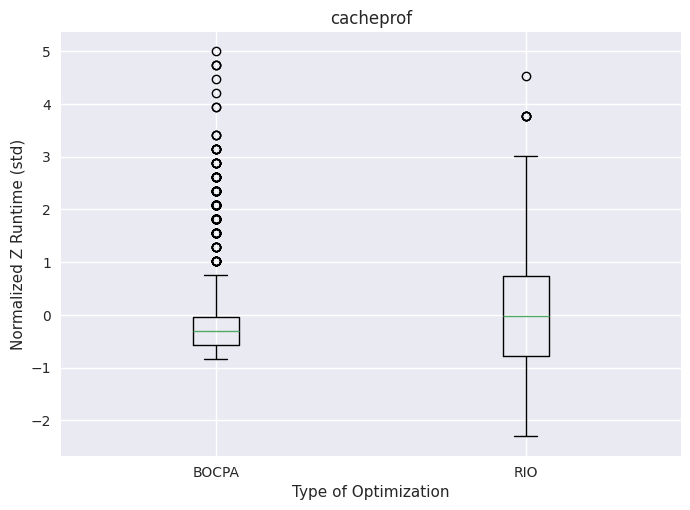

In [518]:
make_Z_boxplot("cacheprof", program_tables)

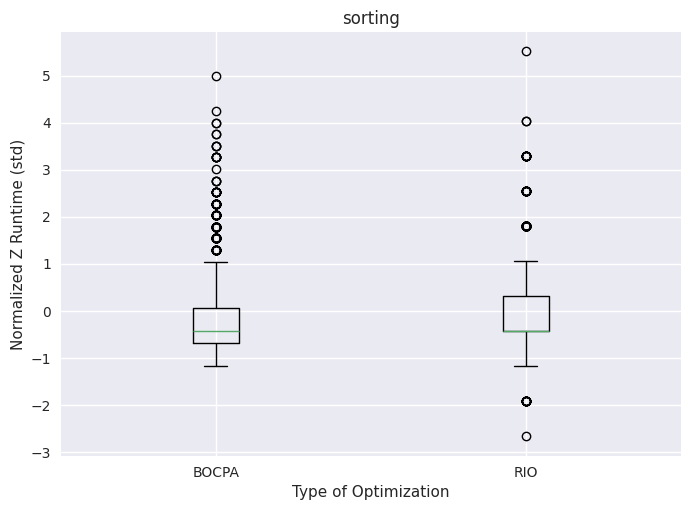

In [519]:
make_Z_boxplot("sorting", program_tables)

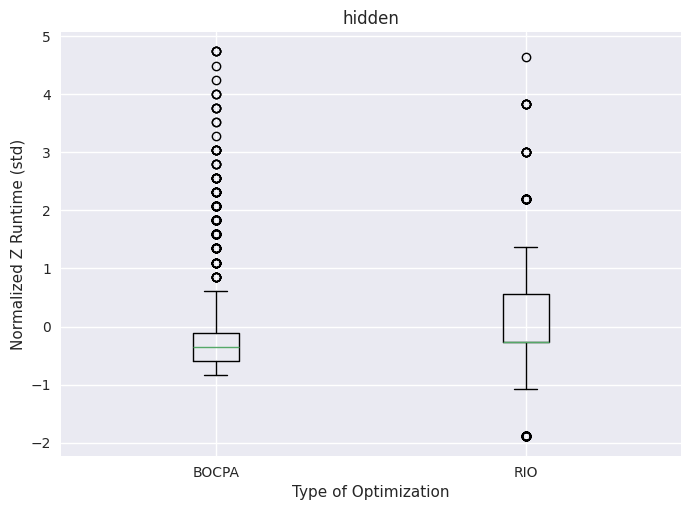

In [520]:
make_Z_boxplot("hidden", program_tables)

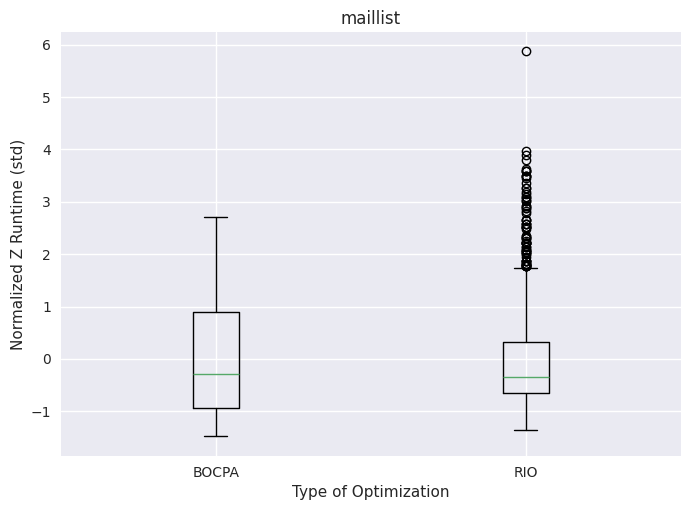

In [521]:
make_Z_boxplot("maillist", program_tables)

#### O2

In [522]:
## Make O2 Plot Function

def make_O2_boxplot(program_name, hash_map):
    fig, ax = plt.subplots()

    lst1 = []
    labels = []
    program_name = program_name
    for type_name, t in hash_map[program_name].items():
        if type_name != "O2":
            lst1.append(t["Norm-Default"])
            labels.append(type_name)
        
    ax.boxplot(lst1)
    ax.set_xticklabels(labels)
    ax.set_ylabel(f"Normalized O2 Runtime (std)")
    ax.set_xlabel(f"Type of Optimization")
    ax.set_title(f"{program_name}")
    
    plt.savefig(f"PO_O2_{program_name}.svg", format="svg")
    plt.show()

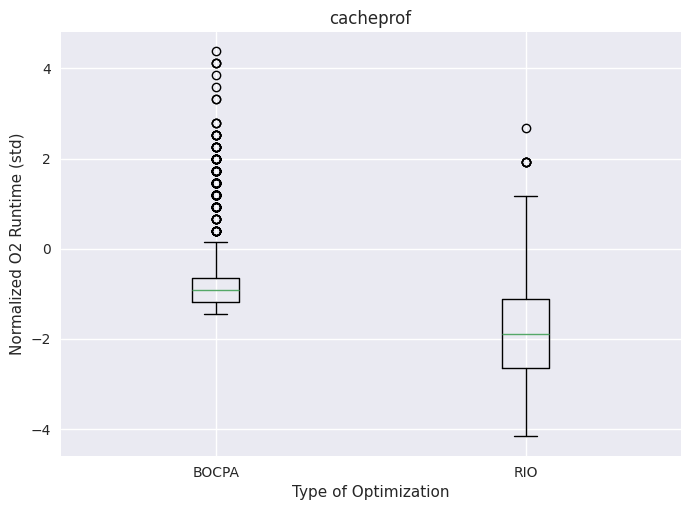

In [523]:
make_O2_boxplot("cacheprof", program_tables)

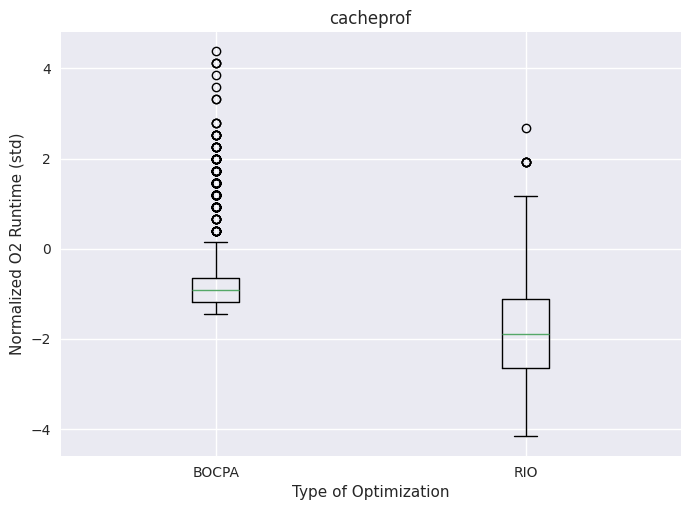

In [524]:
make_O2_boxplot("cacheprof", program_tables)

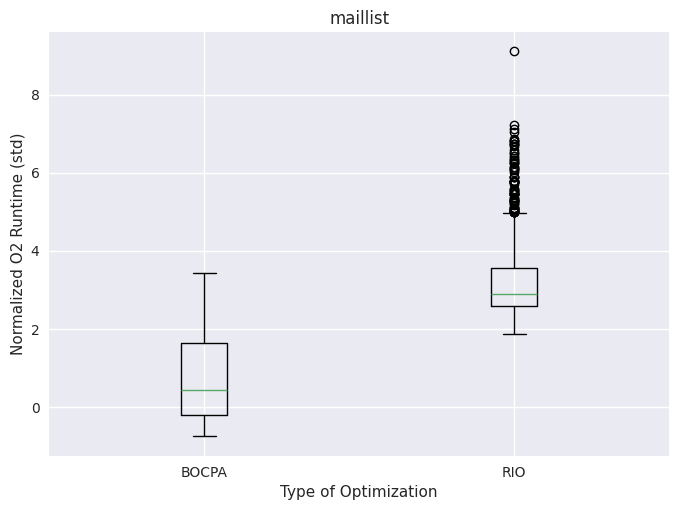

In [525]:
make_O2_boxplot("maillist", program_tables)

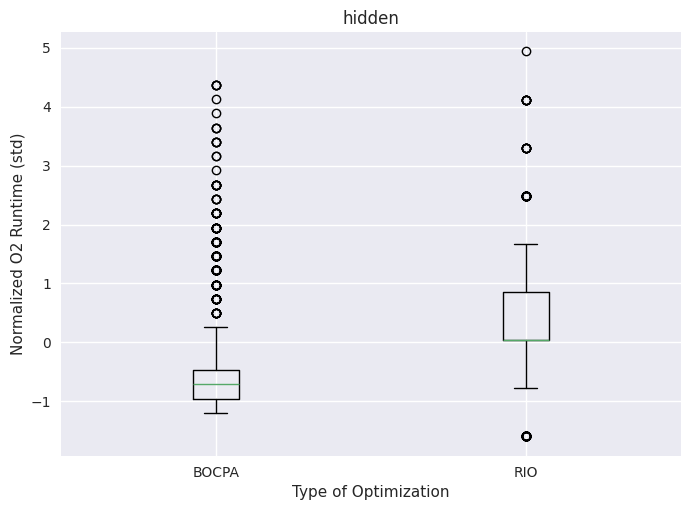

In [526]:
make_O2_boxplot("hidden", program_tables)

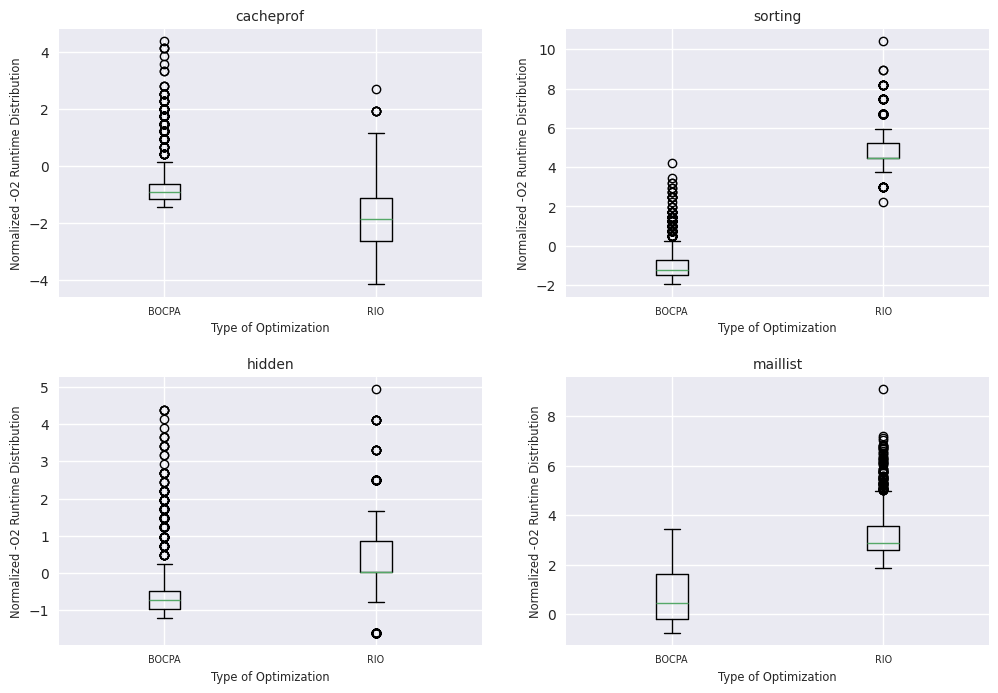

In [527]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)

lst1 = []
labels = []

i = 0
j = 0
for program_name, type_dict in program_tables.items():
    lst1 = []
    labels = []
    O0_line = 0
    for type_name, df in type_dict.items():
        if type_name != "O2":
            lst1.append(df["Norm-Default"])
            labels.append(type_name)
        
        # print(df.head(5))
        # labels.append(type_name)
        # #print(df["Norm-O2"].head(4))
        # # O0_line = df.loc["-O0"]["Norm-O2"]
        # lst1.append(df["Norm-O2"])


    
    ax[i][j].boxplot(lst1)
    ax[i][j].set_xticklabels(labels, fontsize="xx-small")
    ax[i][j].set_ylabel(f"Normalized -O2 Runtime Distribution", fontsize="x-small")
    ax[i][j].set_xlabel(f"Type of Optimization", fontsize="x-small")
    ax[i][j].set_title(f"{program_name}", fontsize="small")

    # ax[i][j].hlines(y=O0_line, xmin=0, xmax=len(labels) + 1, color='b', linestyle='dashed', linewidth=2)
    # ax[i][j].text(len(labels) + 1.1, O0_line, '-O0', fontsize='xx-small', color='b')
    
    j = (j + 1) % 2
    if j == 0:
        i = (i + 1) % 2

plt.savefig('thesis_figures/O2_PO_score_boxplot.svg', format='svg', dpi=1200)
plt.show()


## BOCPA Correctness

In [528]:
def has_required_tuples(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_bad_optimization", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple(tuple_list):
    if ("my_good_optimization", "my_neutral_optimization") in tuple_list and ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Both"
    elif ("my_good_optimization", "my_neutral_optimization") in tuple_list:
        return "Good Only"
    elif ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Bad Only"
    else:
        return "Neither"

### Slow + Fast Rule

#### Single Rule Tests

In [529]:
def weird_apply(iteration, df, category):
    training_set = df[df["Iteration"] <= iteration]
    total_size = training_set.count()
    groups = training_set.groupby("Rules")
    both_rule = groups.size()["Both"] if "Both" in groups.groups else 0
    good_rule = groups.size()["Good Only"] + both_rule if "Good Only" in groups.groups else 0
    bad_rule = groups.size()["Bad Only"] + both_rule if "Bad Only" in groups.groups else 0
    good_rule = good_rule / total_size
    bad_rule = bad_rule / total_size
    if category == "Good Only":
        return good_rule
    else:
        return bad_rule

In [530]:
def build_discrimination_graph(dictionary, table_name, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Runtime"]]
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        #filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)
    
        filtered_df["PercentGood"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Good Only")["Iteration"]
        filtered_df["PercentBad"] = filtered_df["Iteration"].apply(weird_apply, df=filtered_df, category="Bad Only")["Iteration"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentGood"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentBad"], linestyle='--', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
        
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        axes[count].set_yticks([i/4 for i in range(5)])
        
        count += 1
    
    # Add labels and title

    fig.supxlabel('Iteration')
    fig.supylabel('% of Total Population')
    fig.suptitle(table_name)
    
    # Show the legend
    # handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    legend_elements = [
        Line2D([0], [0], linestyle='-', color='k', label='Included Fast Rule'),
        Line2D([0], [0], linestyle='--', color='k', label='Included Slow Rule')
    ]
    
    fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.62, 0.01))
    # plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()


##### 10%

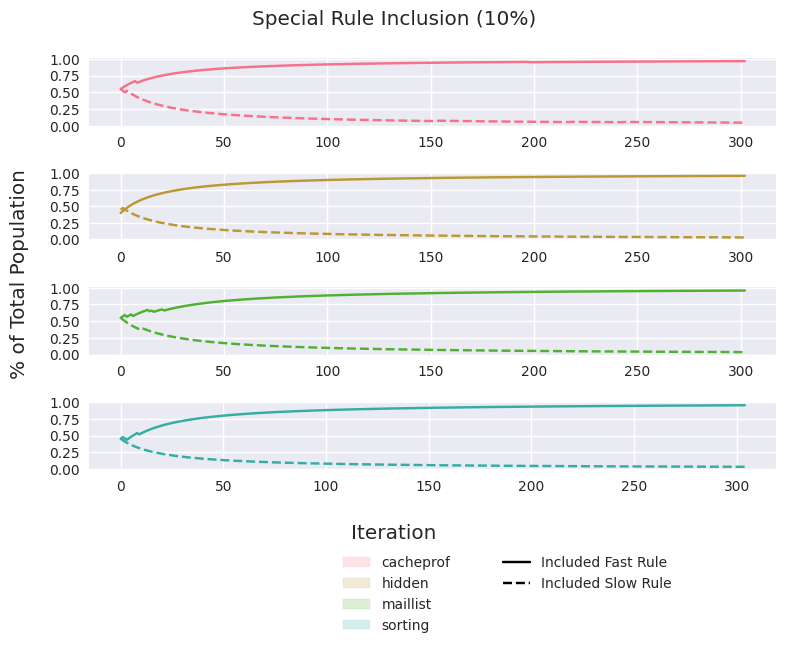

In [531]:
build_discrimination_graph(correctness_tables, "Special Rule Inclusion (10%)", 'Distribution_Scatter_Line.png')

##### 5%

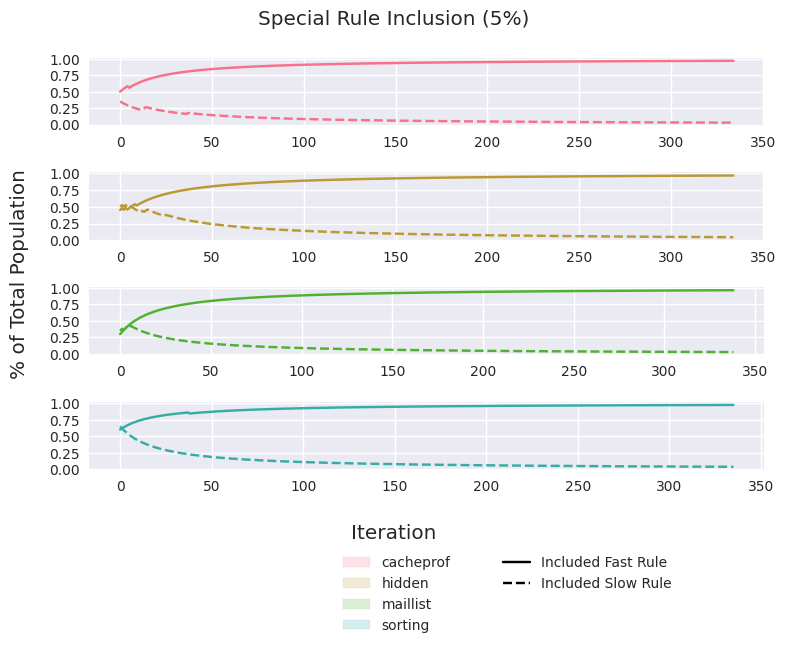

In [532]:
build_discrimination_graph(correctness_tables_5p, "Special Rule Inclusion (5%)", 'Distribution_Scatter_Line_5p.png')

##### 1%

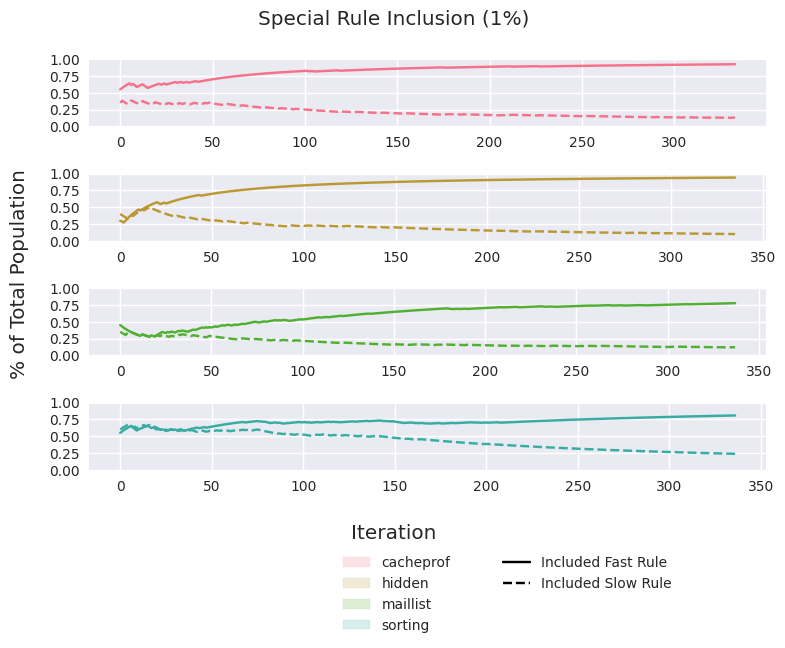

In [533]:
build_discrimination_graph(correctness_tables_1p, "Special Rule Inclusion (1%)", 'Distribution_Scatter_Line_1p.png')

##### 0.5%

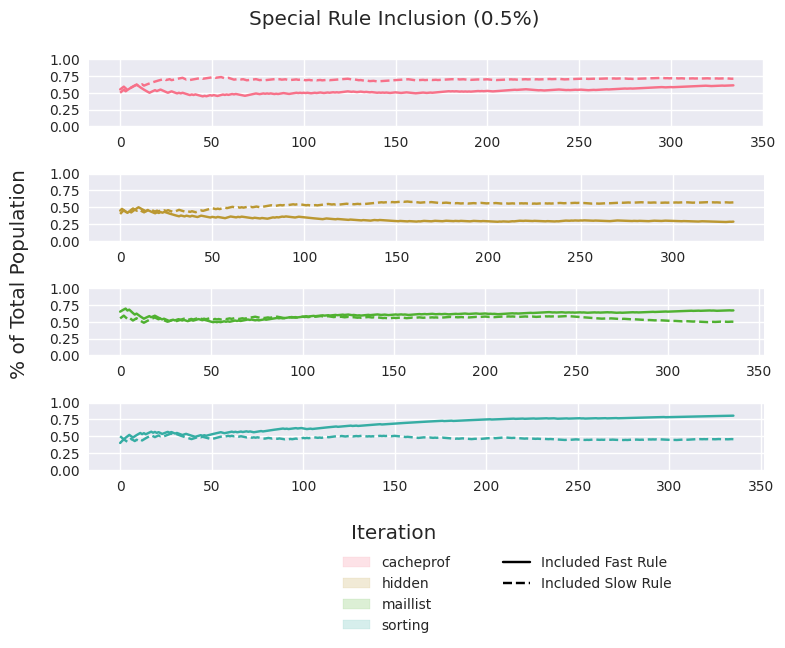

In [534]:
build_discrimination_graph(correctness_tables_005p, "Special Rule Inclusion (0.5%)", 'Distribution_Scatter_Line_005p.png')

### Impactful Collection of Arbitrary Rules

#### Function Set-up

In [535]:
def has_required_tuples_multi(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple_multi(tuple_list):
    intersection_list = list(set(tuple_list).intersection(set([("my_good_optimization", "my_neutral_optimization"), ("my_good_optimization_2", "my_neutral_optimization"), ("my_good_optimization_3", "my_neutral_optimization"), ("my_good_optimization_4", "my_neutral_optimization"), ("my_good_optimization_5", "my_neutral_optimization"), ("my_good_optimization_6", "my_neutral_optimization")])))
    return len(intersection_list)

In [536]:
# Builds Cummulative Test for Rules (NOT IMPACT LIST)
def build_cummulative_rule_graph(dictionary, graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Runtime"]]
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
        filtered_df["Rules"] = filtered_df["Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    # handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

In [537]:
# Builds Cummulative Test for Impact List (NOT RULE LIST)
def build_cummulative_impact_graph(dictionary, graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    # labels = ["Both", "Slow", "Fast"]
    
    # Scatter plot
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Impactful Rules", "Runtime"]].dropna()
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        df_temp["Impactful Rules"] = df_temp["Impactful Rules"].apply(ast.literal_eval)
        
        filtered_df = df_temp.copy()
        filtered_df = df_temp.copy()
        filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"].apply(which_tuple_multi)
        filtered_df["Impactful Rules"] = filtered_df["Impactful Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Impactful Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.lineplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], sizes=(0, 10), label=program_name, ax=axes[count], legend=False)
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        # Adjust y-axis limits to prevent clipping of markers
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

In [538]:
# Line of Best Fit Through Rules (Not Impact List)
def build_cummulative_graph_reg(dictionary, graph_title, file_name):
    fig, axes = plt.subplots(4, 1)
    colors = ["blue", "red", "purple"]
    
    count = 0
    handles = []  # Collect handles from all scatter plots
    labels = []   # Collect labels from all scatter plots
    for program_name, df in dictionary.items():
        df_temp = df[["Iteration", "Rules", "Impactful Rules", "Runtime"]].dropna()
        df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
        
        filtered_df = df_temp.copy()
        filtered_df = df_temp.copy()
        filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple_multi)
        filtered_df["Rules"] = filtered_df["Rules"]/6
        filtered_df["PercentCollected"] = filtered_df["Rules"]
        
        count_2 = 0
        filtered_df = filtered_df.sort_values("Rules", ascending=True)
        scatter = sns.regplot(x=filtered_df["Iteration"], y=filtered_df["PercentCollected"], color=sns.color_palette("husl")[count % 4], label=program_name, ax=axes[count])
        handles.append(scatter.collections[0])  # Append handle for legend
        labels.append(program_name)  # Append label for legend
        count_2 += 1
            
        # Set custom y-axis labels
        axes[count].set_title(None)
        axes[count].set_xlabel(None)
        axes[count].set_ylabel(None)
        ticks = [i/6 for i in range(7)]
        tick_labels = [f'{i}/6' for i in range(7)]
        
        axes[count].set_yticks(ticks)
        axes[count].set_yticklabels(tick_labels)
        
        count += 1
    
    # Add labels and title
    fig.supxlabel('Iteration')
    fig.supylabel('Number of Rules Collected in Candidate')
    fig.suptitle(graph_title)
    
    # Show the legend
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.42, 0.01))
    
    # Show the plot
    fig.tight_layout()
    plt.savefig(f'thesis_figures/{file_name}', bbox_inches='tight')
    plt.show()

#### Multi-Rule Tests

##### Cummulation

In [539]:
#build_cummulative_rule_graph(tables_post_bugfix, "Cummulative Rule Collection after BugFix w/ Various %-Thresholds for Rules 1-6",  'Post_Bugfix_Cummulative.png')

##### Cummulation Regression

In [540]:
#build_cummulative_graph_reg(tables_post_bugfix, "Cummulative Rule Collection after BugFix w/ Various %-Thresholds for Rules 1-6 - Regression Plot",  'Post_Bugfix_Cummulative_Reg.png')

##### Cummulation Impact List

In [541]:
#build_cummulative_impact_graph(tables_post_bugfix, "Collection of Rules in Impact List after BugFix w/ Various %-Thresholds for Rules 1-6", 'Post_Bugfix_Impact_Line.png')

## Feature Importance

### MCA

In [542]:
combined_list = O0_list + O2_list

['static_args',
 'presimplify',
 'specialise',
 'full_laziness_1',
 'simpl3',
 'float_in_1',
 'call_arity',
 'strictness',
 'exitification',
 'full_laziness_2',
 'cse',
 'float_in_2',
 'final',
 'rule_check1',
 'liberate_case',
 'spec_constr',
 'rule_check2',
 'late_specialise',
 'triple_combo',
 'late_dmd_anal',
 'strict_anal',
 'rule_check3',
 'add_caller',
 'add_late']

In [543]:
def generate_all_possible_rules():
    all_rules = []
    for opt_A in combined_list:
        for opt_B in combined_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [544]:
def generate_all_possible_valid_rules():
    # Uses the movable optimization list to create possible pairs. Does not touch the invalid list.
    all_rules = []
    for opt_A in O2_list:
        for opt_B in O2_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [545]:
def generate_BOCA_rules(order_array):
    # Creates rules for orderings. For example ("A", "B") => "A must go before B"
    if (len(combined_list) != len(order_array)):
        raise ValueError(f"What the hell?: Combined List: {len(combined_list)}, Order List: {len(order_array)} \n {order_array}")
    rules_list = []
    blank_list = [None] * (len(combined_list))
    for index, optimization in enumerate(combined_list):
        pos_num = int(order_array[index])
        blank_list[pos_num] = optimization
    for index, opt_A in enumerate(blank_list):
        for opt_B in blank_list[index:]:
            if opt_A != opt_B:
                rules_list.append((opt_A, opt_B))
    return rules_list

In [546]:
def split_phase_order(phase_order):
    print(phase_order)
    return list(filter(lambda x: x != '', phase_order.split("|")))

#### Scaling

In [547]:
scaling_tables = program_tables.copy()

all_rules = generate_all_possible_rules()

feature_df = pd.DataFrame(columns=all_rules + ["Runtime"])
scaled_data = []

# Iterate through each row in the original DataFrame
for program_name, config_dict in scaling_tables.items():
    for config, df in config_dict.items():
        df["Phase"] = df["Phase"].apply(split_phase_order)
        df["Phase"] = df["Phase"].apply(generate_BOCA_rules)
        new_rows = []
        for index, row in df.iterrows():
            # Initialize a list to hold flag values for this row
            rule_values = [0] * len(all_rules)
            
            # Iterate through each flag in the row
            #print(row['Flags'])
            for index, rule in enumerate(row.Phase):
                # Find the index of the flag in my_flags and set the corresponding value to 1
                if rule in all_rules:
                    rule_values[all_rules.index(rule)] = 1
                
            # Append the row to the new DataFrame with flag values and Runtime
            new_rows.append(rule_values + [None])
        scaling=StandardScaler()
        scaling.fit(np.array(df["Runtime"]).reshape(-1, 1))
        scaled_data=scaling.transform(np.array(df["Runtime"]).reshape(-1, 1))
        for index, row in enumerate(new_rows):
            row[len(row) - 1] = scaled_data[index][0]
        new_df = pd.DataFrame(columns=feature_df.columns, data=new_rows)
        feature_df = pd.concat([feature_df, new_df], axis=0)
        

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(np.array(feature_df["Runtime"]).reshape(-1, 1))
# scaled_data=scaling.transform(np.array(feature_df["Runtime"]).reshape(-1, 1))

feature_df.tail(3)

0|1|2|3|4|5|6|7|8|9|10|11|12|13|19|22|23|16|20|14|15|18|17|21
0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|18|16|17|21|23|19|14|15|22
0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|22|14|16|15|23|17|21|18|19
0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|23|20|15|22|19|17|16|18|21
0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|21|23|20|22|17|15|16|18|19
0|1|2|3|4|5|6|7|8|9|10|11|12|13|15|18|14|17|20|21|23|19|22|16
0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|22|21|15|17|14|19|18|23|16
0|1|2|3|4|5|6|7|8|9|10|11|12|13|15|19|17|18|16|14|23|20|21|22
0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|19|17|18|23|16|14|22|21|15
0|1|2|3|4|5|6|7|8|9|10|11|12|13|23|22|15|19|20|17|18|21|16|14
0|1|2|3|4|5|6|7|8|9|10|11|12|13|23|14|21|15|19|16|18|20|22|17
0|1|2|3|4|5|6|7|8|9|10|11|12|13|17|21|18|20|22|14|23|15|16|19
0|1|2|3|4|5|6|7|8|9|10|11|12|13|19|14|21|23|17|20|18|22|16|15
0|1|2|3|4|5|6|7|8|9|10|11|12|13|20|18|16|15|21|19|17|14|22|23
0|1|2|3|4|5|6|7|8|9|10|11|12|13|22|18|17|20|19|14|15|23|16|21
0|1|2|3|4|5|6|7|8|9|10|11|12|13|18|19|14|16|20|17|15|21|22|23
0|1|2|3|

ValueError: What the hell?: Combined List: 24, Order List: 23 
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '20', '21', '18', '16', '19', '15', '14', '22', '17']

### MCA = Impactful Features from BOCPA?